In [1]:
%matplotlib widget
# %load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from suite2p.blat.behaviour import extract_behaviour

root = '/home/loulou/Documents/Data/Test/place_cells2'

spks = np.load('/'.join((root, 'suite2p/plane0/spks.npy')), allow_pickle=True)
md = np.load('/'.join((root, 'suite2p/plane0/model.npy')), allow_pickle=True)
iscell = np.load('/'.join((root, 'suite2p/plane0/iscell.npy')), allow_pickle=True)
iscell = iscell[:, 0].astype(bool)
spks = spks[iscell, :]

fn = '/home/loulou/Documents/Data/Test/place_cells2/behaviour_00009.h5'
behaviour = extract_behaviour(fn)

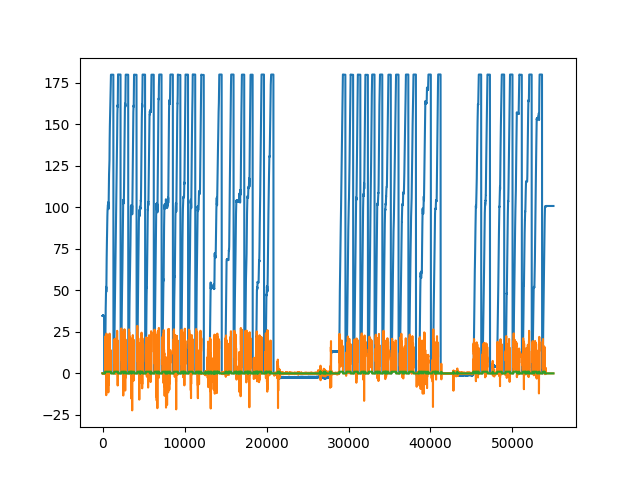

In [13]:
fig = plt.figure()
plt.plot(behaviour['position'])
plt.plot(behaviour['velocity'])
plt.plot(behaviour['movement'])

In [52]:
from suite2p.blat import space

hmap = space.hmaps(behaviour, spks)
stack = hmap['smooth']['stack'].T
rasters = hmap['smooth']['rasters']
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

# fig = plt.figure()
# plt.imshow(rasters[9, :, :].T)
# plt.plot(behaviour['position'][behaviour['movement']])

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/KSG.py:62: RuntimeWarning: Estimated mutual information contains negatives.
  warnings.warn('Estimated mutual information contains negatives.', RuntimeWarning)


Output()

KeyboardInterrupt: 

In [53]:
from suite2p.blat import space

hmap1 = space.hmaps(behaviour, spks)
hmap2 = space.hmaps(behaviour, spks)
hmap3 = space.hmaps(behaviour, spks)
p1 = hmap1['prob']
p2 = hmap2['prob']
p3 = hmap3['prob']

Output()

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:70: RuntimeWarning: invalid value encountered in divide
  rasters = np.array([np.histogramdd(idx, range=ranges, bins=bins, weights=spks[i, :])[0] for i in range(spks.shape[0])])


Output()

Output()

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,  2.,  4.,  1.,  1.,  1.,
         3.,  4.,  3.,  1.,  6.,  3.,  9., 11.,  8., 10., 23., 90.]),
 array([0.024  , 0.06296, 0.10192, 0.14088, 0.17984, 0.2188 , 0.25776,
        0.29672, 0.33568, 0.37464, 0.4136 , 0.45256, 0.49152, 0.53048,
        0.56944, 0.6084 , 0.64736, 0.68632, 0.72528, 0.76424, 0.8032 ,
        0.84216, 0.88112, 0.92008, 0.95904, 0.998  ]),
 <BarContainer object of 25 artists>)

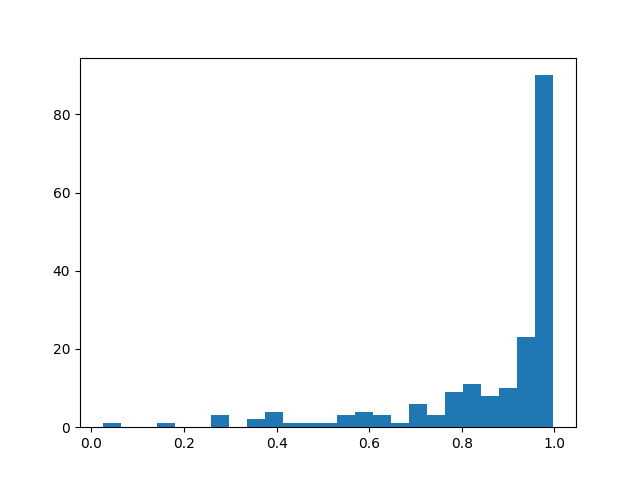

In [54]:
fig = plt.figure()
plt.hist(p1, 25)

In [56]:
print(np.sum(p1 >= .99))
print(np.sum(p2 >= .99))
print(np.sum(p3 >= .99))

45
51
46


/tmp/ipykernel_694257/556416614.py:7: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_694257/556416614.py:10: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)


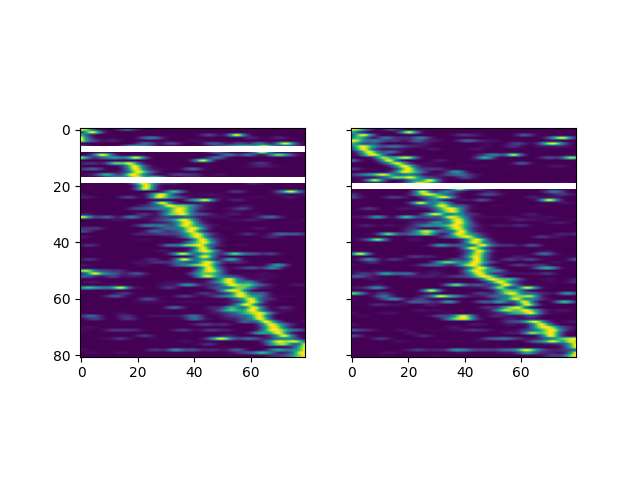

In [17]:
stack = hmap['smooth']['stack'][p3 >= .95, :].T
rasters = hmap['smooth']['rasters'][p3 >= .95, :, :]
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

90


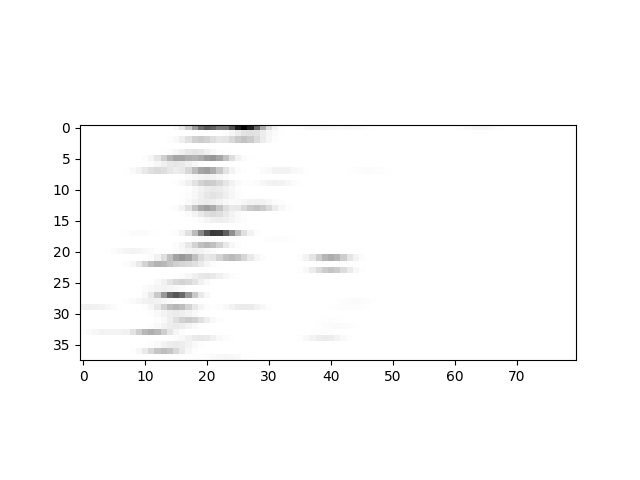

In [299]:
idx = np.argmax(hmap['SI'])
print(idx)
fig = plt.figure()
plt.imshow(-hmap['smooth']['rasters'][idx, :, :].T, cmap='gray')

In [25]:
from suite2p.blat import utils
from suite2p.blat.KSG import ksg_mi

x = spks
y = behaviour['position']
x = utils.fast_smooth(x, 30, axis=1)
I = ksg_mi(x, y)

print(I)

[0.59962109 0.78178204 0.61399831 0.86917129 0.81424362 0.80296429
 0.14128759 0.77424615 0.71086388 0.56384956 0.95164856 0.84247218
 0.6946738  0.80078692 0.793635   0.49799164 0.84525993 0.77166463
 0.72389328 0.76096881 0.88222057 0.68025807 0.73826321 0.70056696
 0.79351794 0.78617407 0.65806696 0.84640911 0.76687837 0.68947011
 0.86913891 0.87128161 0.84053806 0.58159217 1.07872352 0.83999473
 0.76140171 0.84820889 0.89363191 0.81900002 0.85574554 0.71888905
 0.61556691 0.79290043 0.85076713 0.62820731 0.67497805 1.00349563
 0.77147319 0.84512813 0.88193401 0.63139516 0.78887817 0.82144869
 0.82398315 0.75989398 0.79628134 0.86819738 0.29582348 0.81129488
 0.77062802 0.63205267 0.82699237 0.61335956 0.85338674 0.82079326
 0.75222123 0.7888504  0.84254633 0.77742378 0.74900903 0.79728951
 0.81847534 0.90333587 0.76566075 0.82480251 0.85991175 0.58195156
 0.77017208 0.62905727 0.71875949 0.64224467 0.78978992 0.75545424
 0.53419471 0.83853492 0.8296275  0.31934635 0.79314226 0.8324

In [149]:
print(np.argmax(I))

90


(array([ 1.,  0.,  1.,  1.,  0.,  0.,  3.,  4.,  2., 11., 16., 28., 29.,
        30., 19.,  8.,  8.,  7.,  6.,  5.,  2.,  0.,  2.,  1.,  1.]),
 array([0.42662851, 0.48412419, 0.54161987, 0.59911555, 0.65661123,
        0.71410692, 0.7716026 , 0.82909828, 0.88659396, 0.94408964,
        1.00158532, 1.05908101, 1.11657669, 1.17407237, 1.23156805,
        1.28906373, 1.34655941, 1.40405509, 1.46155078, 1.51904646,
        1.57654214, 1.63403782, 1.6915335 , 1.74902918, 1.80652487,
        1.86402055]),
 <BarContainer object of 25 artists>)

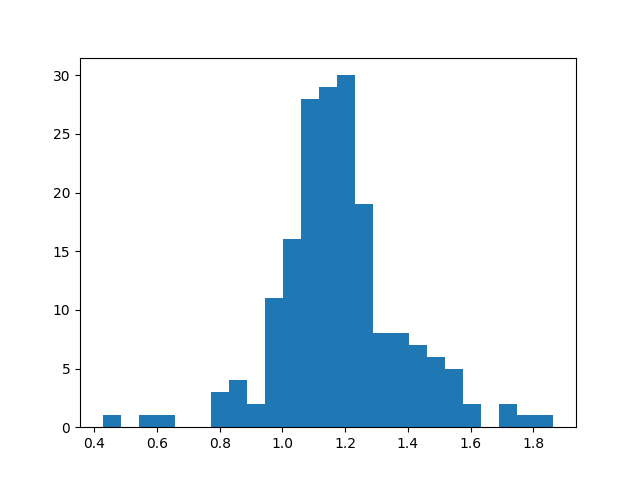

In [150]:
fig = plt.figure()
plt.hist(I, 25)

In [50]:
import pandas as pd

test = tuple(map(tuple, np.arange(6).reshape(3, 2).tolist()))
test = set(test)
np.array(list(test))

array([[0, 1],
       [4, 5],
       [2, 3]])